# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_study_data = pd.merge(study_results,mouse_metadata , how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mice_study_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
#removed the duplicates from the data set by group by Mouse ID
micetotal_groups=mice_study_data.groupby("Mouse ID").count()
micetotal_groups

#Present the number of unique mouse IDs.
mousenumber_unique = mice_study_data["Mouse ID"].unique()
mousenumber_unique
Mouse_count = len(mousenumber_unique)
Mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data=mice_study_data.loc[mice_study_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"]
duplicate_data.unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data_mouse=mice_study_data.loc[mice_study_data["Mouse ID"] == "g989"]
duplicate_data_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata=mice_study_data.loc[mice_study_data["Mouse ID"] != "g989"]
cleandata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleandata_unique = cleandata["Mouse ID"].unique()
cleandata_unique
cleandata_count = len(cleandata_unique)
cleandata_count


248

## Summary Statistics

In [7]:
groupobject=cleandata.groupby("Drug Regimen")
TumorVolumeMean=groupobject["Tumor Volume (mm3)"].mean()
TumorVolumeMed=groupobject["Tumor Volume (mm3)"].median()
TumorVolumeVar=groupobject["Tumor Volume (mm3)"].var()
TumorVolumeSd=groupobject["Tumor Volume (mm3)"].std()
TumourVolumeSem=groupobject["Tumor Volume (mm3)"].sem()

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df=pd.DataFrame({"Mean Tumor Volume": TumorVolumeMean,
                         "Median Tumor Volume": TumorVolumeMed,
                         "Tumor Volume Variance": TumorVolumeVar,
                         "Tumor Volume Std. Dev": TumorVolumeSd,
                         "Tumor Volume Std. Err.": TumourVolumeSem})
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

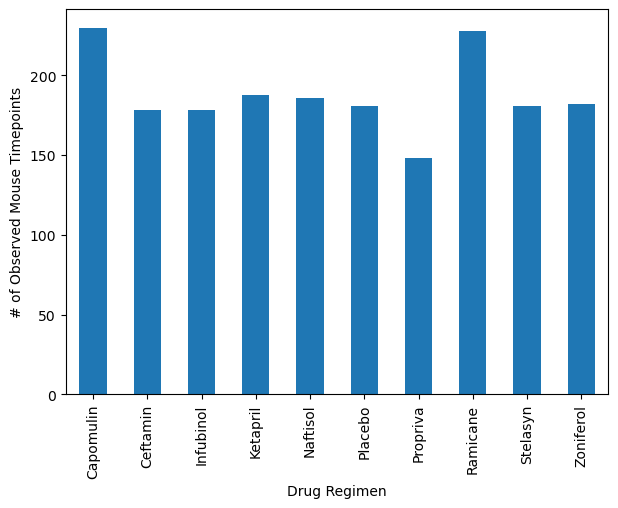

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
MTP=groupobject["Timepoint"].count()
MTP
PandaBar_chart = MTP.plot(kind='bar', figsize=(7,5))
PandaBar_chart.set_xlabel("Drug Regimen")
PandaBar_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

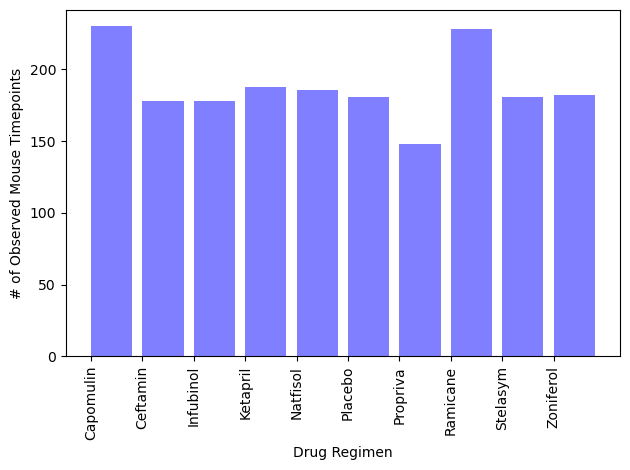

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drugs= ["Capomulin","Ceftamin","Infubinol", "Ketapril",  "Natfisol","Placebo", "Propriva","Ramicane", "Stelasym","Zoniferol"]
x_axis=(len(Drugs))
plt.bar(Drugs, MTP, color='b', alpha=0.5, align="edge")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

In [12]:
cleandata["Sex"].value_counts()


Male      958
Female    922
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

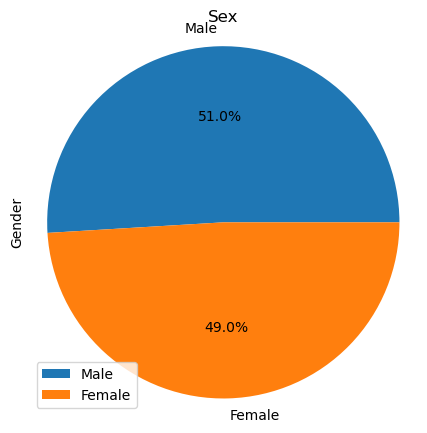

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleandata["Sex"].value_counts()
mouse_gender_pie = pd.DataFrame({'Gender': [958,922]},
                                 index=['Male','Female'])
mouse_gender_pie.plot.pie(y='Gender',autopct="%1.1f%%", figsize=(5,5))
plt.title("Sex")
plt.axis("equal")
plt.show

Text(0, 0.5, 'Sex')

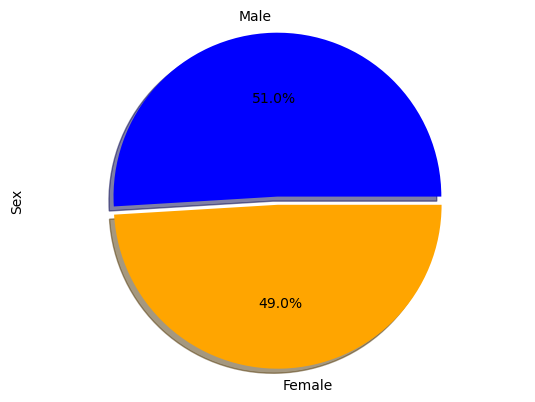

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

sizes = [958, 922,]

colours = ["blue", "orange"]
explode = (0.05, 0,)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Revised_Drug_data=cleandata.loc[(cleandata["Drug Regimen"] == "Capomulin")|
                                (cleandata["Drug Regimen"] =="Ramicane")|
                                (cleandata["Drug Regimen"] =="Infubinol")|
                                (cleandata["Drug Regimen"] =="Ceftamin")]
Revised_Drug_data
# Start by getting the last (greatest) timepoint for each mouse
micegroup=Revised_Drug_data.groupby("Mouse ID")
LastTimepoint=micegroup["Timepoint"].max()
LastTimepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_study_data = pd.merge(Revised_Drug_data, LastTimepoint, how="inner", on=["Mouse ID", "Timepoint"])


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =["Capomulin","Ramicane","Infubinol","Ceftamin"]
    
# Create empty list to fill with tumor vol data (for plotting)
tumourvoldata=[] 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    quartiles = drug_study_data.loc[drug_study_data["Drug Regimen"]==treatment,"Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumourvoldata.append(drug_study_data.loc[drug_study_data["Mouse ID"]==treatment,"Tumor Volume (mm3)"])
    # add subset 
    
    #Determine outliers using upper and lower bounds
    print(f"{treatment}'s potential outliers:{tumourvoldata}")

Tumor Volume (mm3)    Axes(0.125,0.11;0.775x0.77)
dtype: object

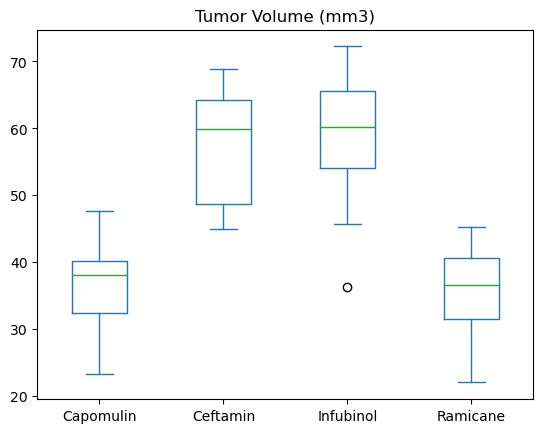

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplottest=drug_study_data.set_index("Drug Regimen")["Tumor Volume (mm3)"]
Box_plot_df=pd.DataFrame(boxplottest).reset_index()
Box_plot_df

Box_plot_df.plot.box(column="Tumor Volume (mm3)", by ="Drug Regimen")

## Line and Scatter Plots

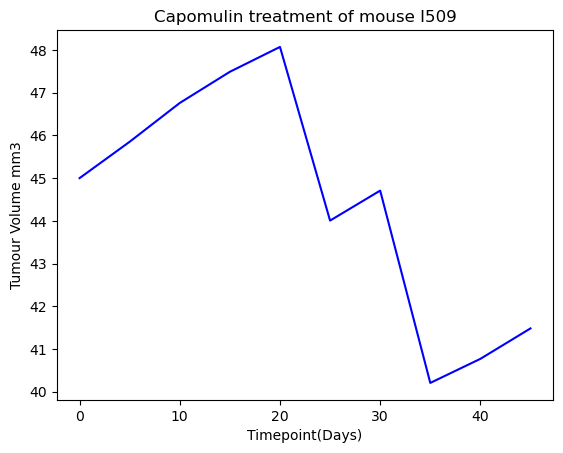

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Singlemouse=cleandata.loc[cleandata["Mouse ID"] == "l509"]
Singlemouse
x_axis=Singlemouse["Timepoint"]
y_axis=Singlemouse["Tumor Volume (mm3)"]
plt.ylabel("Tumour Volume mm3")
plt.xlabel("Timepoint(Days)")
plt.title("Capomulin treatment of mouse I509") 
plt.plot(x_axis, y_axis, color='blue')

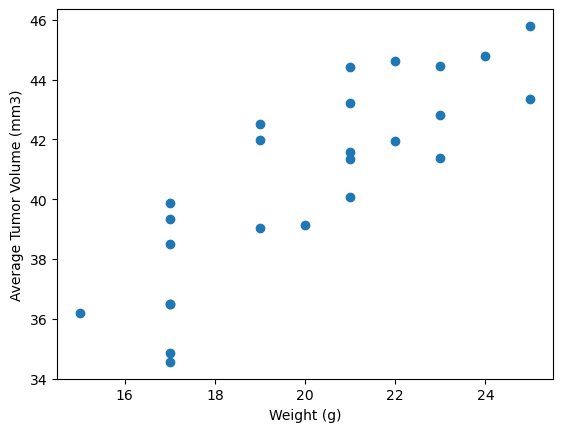

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Scattermice=cleandata.loc[cleandata["Drug Regimen"] == "Capomulin"]
Scattermice
drugmicetest=Scattermice.groupby(["Mouse ID"])
averagemice=drugmicetest[["Weight (g)","Tumor Volume (mm3)"]].mean()

x_values=averagemice["Weight (g)"] 
y_values=averagemice["Tumor Volume (mm3)"]

plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.scatter(x_values,y_values) 
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.8419363424694721


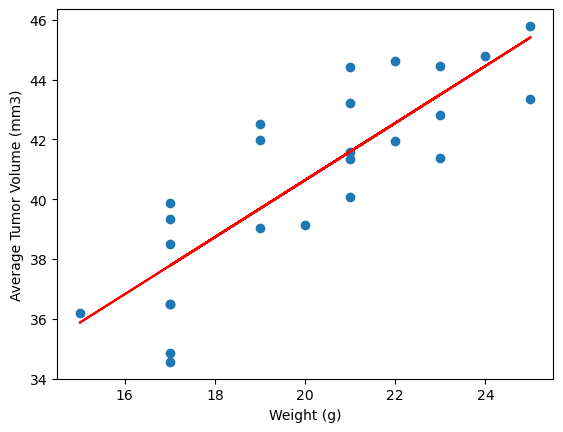

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values=averagemice["Weight (g)"] 
y_values=averagemice["Tumor Volume (mm3)"]
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between mouse weight and the average tumor volume is: {rvalue}")
plt.scatter(x_values,y_values)
plt.show()